In [1]:
import scipy.io
import pandas as pd
import numpy as np

# Load fMRI data
mat_nb = scipy.io.loadmat('E:/Brain_Develop_Knock/KARIM and ME/nback_fmri_power264.mat')
fmri_data = mat_nb.get('nback_fmri_power264')[0]

# Load phenotype data
pheno_data = pd.read_excel('E:/Brain_Develop_Knock/KARIM and ME/upenn_meta_cnb.xlsx')
subj_id_pheno = pheno_data['subject id']

# Load p264 template
p264_template = pd.read_excel('E:/Brain_Develop_Knock/KARIM and ME/PP264_template_subnet.xls', header=0)


In [34]:
# Initialize a list to store correlation features for each subnetwork
correlation_features_per_subnet = []

# Initialize lists to store correlation features for each subnet and age
correlation_features_per_subnet = [[] for _ in range(14)]  # Initialize a list for each subnet
age_in_month_subnet = []  # Initialize age_in_month_subnet as a list


In [35]:
len(mat_nb.get('nback_fmri_power264')[0])
subj_count = 0

In [36]:
print(f"SUBJ_COUNT is: {subj_count}")

subj_id_nb = fmri_data[subj_count][0][0][0][0][0]
subj_id_nb

SUBJ_COUNT is: 0


array([6.00009963e+11])

In [8]:
# Check if subject is present in pheno_data
if subj_id_nb in subj_id_pheno.values:
    # Get age of the subject in months
    subj_age_in_month = np.array(mat_nb.get('nback_fmri_power264')[0][subj_count][0][0][0][1])
    print("subj_age_in_month", subj_age_in_month)
    
    # Extract bold signals for all 264 regions
    bold_signals_all_regions = fmri_data[subj_count][2]
    print("bold_signals_all_regions", bold_signals_all_regions.shape)

    # Compute Pearson correlation for all regions without transposing
    correlation_matrix_all_regions = np.corrcoef(bold_signals_all_regions)
    print("correlation_matrix_all_regions", correlation_matrix_all_regions.shape)
    

subj_age_in_month [[116]]
bold_signals_all_regions (264, 231)
correlation_matrix_all_regions (264, 264)


In [23]:
subnet_count = 1
subnet_inds = p264_template[p264_template['subnet_inds'] == subnet_count]['Original_ROI'].values - 1
print("subnet_inds", subnet_inds)

subnet_inds [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40 254]


In [10]:
subnet_inds = [12]

In [26]:
values_before_diagonal = [
    correlation_matrix_all_regions[i, subnet_col] for subnet_col in (np.array(subnet_inds)-1) for i in range(subnet_col)
]
np.array(values_before_diagonal).shape

(978,)

In [38]:

# Initialize a list to store correlation features for each subnetwork
correlation_features_per_subnet = []

# Initialize lists to store correlation features for each subnet and age
correlation_features_per_subnet = [[] for _ in range(14)]  # Initialize a list for each subnet
age_in_month_subnet = []  # Initialize age_in_month_subnet as a list

# Iterate through subjects
for subj_count in range(len(mat_nb.get('nback_fmri_power264')[0])):
    print(f"SUBJ_COUNT is: {subj_count}")

    subj_id_nb = fmri_data[subj_count][0][0][0][0][0]

    # Check if subject is present in pheno_data
    if subj_id_nb in subj_id_pheno.values:
        # Get age of the subject in months
        subj_age_in_month = np.array(mat_nb.get('nback_fmri_power264')[0][subj_count][0][0][0][1])

        # Extract bold signals for all 264 regions
        bold_signals_all_regions = fmri_data[subj_count][2]

        # Compute Pearson correlation for all regions without transposing
        correlation_matrix_all_regions = np.corrcoef(bold_signals_all_regions)

        # Iterate through subnetwork columns
        for subnet_count in range(1, 15):
            # Get subnet indices from p264_template
            subnet_inds = p264_template[p264_template['subnet_inds'] == subnet_count]['Original_ROI'].values - 1

            #print(f"subj_count: {subj_count}, subnet_count: {subnet_count}, subnet_inds: {subnet_inds}")

            # Extract values before the diagonal element for the current subnet
            values_before_diagonal = [
                correlation_matrix_all_regions[i, subnet_col] for subnet_col in (np.array(subnet_inds)) for i in range(subnet_col)
            ]

            #print(f"Shape of values_before_diagonal: {len(values_before_diagonal)}")

            # Append the list for the current subnet with values_before_diagonal
            correlation_features_per_subnet[subnet_count - 1].append(values_before_diagonal)

            #print(f"Shape of correlation_features_per_subnet {subnet_count}: {np.array(correlation_features_per_subnet[subnet_count - 1]).shape}")

        # Store age in months for the current subject
        age_in_month_subnet.append(subj_age_in_month)

# Convert the lists of lists to a list of 2D NumPy arrays for further analysis
correlation_features_per_subnet = [np.array(features) for features in correlation_features_per_subnet]
age_in_month_subnet = np.array(age_in_month_subnet)

# Print shapes
for i, features in enumerate(correlation_features_per_subnet, start=1):
    print(f"Shape of correlation_features_per_subnet{i}: {features.shape}")

print(f"Shape of age_in_month_subnet: {age_in_month_subnet.shape}")



SUBJ_COUNT is: 0
SUBJ_COUNT is: 1
SUBJ_COUNT is: 2
SUBJ_COUNT is: 3
SUBJ_COUNT is: 4
SUBJ_COUNT is: 5
SUBJ_COUNT is: 6
SUBJ_COUNT is: 7
SUBJ_COUNT is: 8
SUBJ_COUNT is: 9
SUBJ_COUNT is: 10
SUBJ_COUNT is: 11
SUBJ_COUNT is: 12
SUBJ_COUNT is: 13
SUBJ_COUNT is: 14
SUBJ_COUNT is: 15
SUBJ_COUNT is: 16
SUBJ_COUNT is: 17
SUBJ_COUNT is: 18
SUBJ_COUNT is: 19
SUBJ_COUNT is: 20
SUBJ_COUNT is: 21
SUBJ_COUNT is: 22
SUBJ_COUNT is: 23
SUBJ_COUNT is: 24
SUBJ_COUNT is: 25
SUBJ_COUNT is: 26
SUBJ_COUNT is: 27
SUBJ_COUNT is: 28
SUBJ_COUNT is: 29
SUBJ_COUNT is: 30
SUBJ_COUNT is: 31
SUBJ_COUNT is: 32
SUBJ_COUNT is: 33
SUBJ_COUNT is: 34
SUBJ_COUNT is: 35
SUBJ_COUNT is: 36
SUBJ_COUNT is: 37
SUBJ_COUNT is: 38
SUBJ_COUNT is: 39
SUBJ_COUNT is: 40
SUBJ_COUNT is: 41
SUBJ_COUNT is: 42
SUBJ_COUNT is: 43
SUBJ_COUNT is: 44
SUBJ_COUNT is: 45
SUBJ_COUNT is: 46
SUBJ_COUNT is: 47
SUBJ_COUNT is: 48
SUBJ_COUNT is: 49
SUBJ_COUNT is: 50
SUBJ_COUNT is: 51
SUBJ_COUNT is: 52
SUBJ_COUNT is: 53
SUBJ_COUNT is: 54
SUBJ_COUNT is: 55
SU

SUBJ_COUNT is: 440
SUBJ_COUNT is: 441
SUBJ_COUNT is: 442
SUBJ_COUNT is: 443
SUBJ_COUNT is: 444
SUBJ_COUNT is: 445
SUBJ_COUNT is: 446
SUBJ_COUNT is: 447
SUBJ_COUNT is: 448
SUBJ_COUNT is: 449
SUBJ_COUNT is: 450
SUBJ_COUNT is: 451
SUBJ_COUNT is: 452
SUBJ_COUNT is: 453
SUBJ_COUNT is: 454
SUBJ_COUNT is: 455
SUBJ_COUNT is: 456
SUBJ_COUNT is: 457
SUBJ_COUNT is: 458
SUBJ_COUNT is: 459
SUBJ_COUNT is: 460
SUBJ_COUNT is: 461
SUBJ_COUNT is: 462
SUBJ_COUNT is: 463
SUBJ_COUNT is: 464
SUBJ_COUNT is: 465
SUBJ_COUNT is: 466
SUBJ_COUNT is: 467
SUBJ_COUNT is: 468
SUBJ_COUNT is: 469
SUBJ_COUNT is: 470
SUBJ_COUNT is: 471
SUBJ_COUNT is: 472
SUBJ_COUNT is: 473
SUBJ_COUNT is: 474
SUBJ_COUNT is: 475
SUBJ_COUNT is: 476
SUBJ_COUNT is: 477
SUBJ_COUNT is: 478
SUBJ_COUNT is: 479
SUBJ_COUNT is: 480
SUBJ_COUNT is: 481
SUBJ_COUNT is: 482
SUBJ_COUNT is: 483
SUBJ_COUNT is: 484
SUBJ_COUNT is: 485
SUBJ_COUNT is: 486
SUBJ_COUNT is: 487
SUBJ_COUNT is: 488
SUBJ_COUNT is: 489
SUBJ_COUNT is: 490
SUBJ_COUNT is: 491
SUBJ_COUNT i

SUBJ_COUNT is: 878
SUBJ_COUNT is: 879
SUBJ_COUNT is: 880
SUBJ_COUNT is: 881
SUBJ_COUNT is: 882
SUBJ_COUNT is: 883
SUBJ_COUNT is: 884
SUBJ_COUNT is: 885
SUBJ_COUNT is: 886
SUBJ_COUNT is: 887
SUBJ_COUNT is: 888
SUBJ_COUNT is: 889
SUBJ_COUNT is: 890
SUBJ_COUNT is: 891
SUBJ_COUNT is: 892
SUBJ_COUNT is: 893
SUBJ_COUNT is: 894
SUBJ_COUNT is: 895
SUBJ_COUNT is: 896
SUBJ_COUNT is: 897
SUBJ_COUNT is: 898
SUBJ_COUNT is: 899
SUBJ_COUNT is: 900
SUBJ_COUNT is: 901
SUBJ_COUNT is: 902
SUBJ_COUNT is: 903
SUBJ_COUNT is: 904
SUBJ_COUNT is: 905
SUBJ_COUNT is: 906
SUBJ_COUNT is: 907
SUBJ_COUNT is: 908
SUBJ_COUNT is: 909
Shape of correlation_features_per_subnet1: (894, 1008)
Shape of correlation_features_per_subnet2: (894, 215)
Shape of correlation_features_per_subnet3: (894, 735)
Shape of correlation_features_per_subnet4: (894, 858)
Shape of correlation_features_per_subnet5: (894, 5994)
Shape of correlation_features_per_subnet6: (894, 754)
Shape of correlation_features_per_subnet7: (894, 4867)
Shape of co

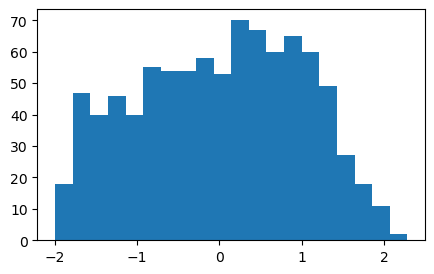

In [41]:
import scipy.stats as stats
y = np.array(age_in_month_subnet)
ages = y[:, :, 0]
zscores_age = stats.zscore(ages)
#print(zscores_age)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(zscores_age, bins = 20)
# Show plot
plt.show()

In [44]:
import scipy.stats as stats
import numpy as np

# Assuming you have zscores_age and zscores defined previously
excl_sub = 0.98

# Finding indices of rows to be removed
included_rows_indices = np.where(~((zscores_age > -excl_sub) & (zscores_age < excl_sub)))

# Retrieve the indices for rows to be removed
included_rows = excluded_rows_indices[0]

# Print or use the excluded_rows as needed
print("Indices of excluded rows:", included_rows)

Indices of excluded rows: [  0   3   4   5   6   9  10  16  18  20  22  23  26  28  33  37  38  41
  43  44  45  47  48  49  50  56  57  59  64  67  68  73  76  77  78  79
  82  83  86  87  89  92  94  97 100 105 109 116 117 120 121 122 125 128
 129 131 132 136 137 139 143 144 148 151 152 154 156 158 159 166 168 171
 173 174 181 183 184 188 191 192 201 202 204 205 206 208 209 213 217 219
 223 225 229 230 232 235 236 238 239 242 244 245 246 247 249 250 253 255
 256 258 262 263 264 265 270 271 275 276 281 288 290 291 293 294 295 296
 298 299 303 306 310 312 313 314 315 319 323 324 325 327 329 330 332 340
 343 344 346 347 350 351 357 358 360 361 362 363 367 368 369 370 371 372
 375 376 378 379 382 387 388 389 392 394 395 398 399 406 407 408 409 410
 411 413 416 419 420 425 427 428 432 433 436 440 443 444 449 451 455 457
 458 460 462 463 465 466 467 469 470 474 475 476 480 482 492 497 503 506
 507 510 512 516 517 518 524 525 528 530 535 540 542 543 553 554 559 570
 572 573 574 578 583 585 

In [45]:
# Assuming you already have the excluded_rows from the previous code

# Use excluded_rows to keep specific rows in zscores_age
zscores_age_filtered = zscores_age[included_rows]

# Print or use zscores_age_filtered as needed
print("Shape of zscores_age_filtered:", zscores_age_filtered.shape)


Shape of zscores_age_filtered: (360, 1)


In [82]:
# Assuming you already have the included_rows from the previous code

# Use excluded_rows to keep specific rows in each list of correlation_features_per_subnet
correlation_features_per_subnet_filtered = [
    subnet_features[included_rows] for subnet_features in correlation_features_per_subnet
]

# Print or use correlation_features_per_subnet_filtered as needed
for i, features in enumerate(correlation_features_per_subnet_filtered, start=1):
    print(f"Shape of correlation_features_per_subnet_filtered{i}: {features.shape}")


Shape of correlation_features_per_subnet_filtered1: (360, 1008)
Shape of correlation_features_per_subnet_filtered2: (360, 215)
Shape of correlation_features_per_subnet_filtered3: (360, 735)
Shape of correlation_features_per_subnet_filtered4: (360, 858)
Shape of correlation_features_per_subnet_filtered5: (360, 5994)
Shape of correlation_features_per_subnet_filtered6: (360, 754)
Shape of correlation_features_per_subnet_filtered7: (360, 4867)
Shape of correlation_features_per_subnet_filtered8: (360, 4693)
Shape of correlation_features_per_subnet_filtered9: (360, 3789)
Shape of correlation_features_per_subnet_filtered10: (360, 2951)
Shape of correlation_features_per_subnet_filtered11: (360, 2037)
Shape of correlation_features_per_subnet_filtered12: (360, 2832)
Shape of correlation_features_per_subnet_filtered13: (360, 974)
Shape of correlation_features_per_subnet_filtered14: (360, 3009)


In [83]:
# Assuming you already have zscores_age_filtered and excl_sub defined

# Apply thresholding to zscores_age_filtered
zscores_age_thresholded = np.where(zscores_age_filtered < -excl_sub, 0, np.where(zscores_age_filtered > excl_sub, 1, zscores_age_filtered))

# Print or use zscores_age_thresholded as needed
print("Shape of zscores_age_thresholded:", zscores_age_thresholded)


Shape of zscores_age_thresholded: [[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]


In [84]:

# Function to normalize a group
def normalize_group(group):
    min_val = np.min(group, axis=0)
    max_val = np.max(group, axis=0)
    normalized_group = (group - min_val) / (max_val - min_val)
    return normalized_group


# Extract the number of subjects
num_subjects = correlation_features_per_subnet_filtered[0].shape[0]
print("num_subjects:", num_subjects)

# Convert correlation_features_per_subnet to include a third dimension (batch_size, input_dim)
X_subnet = [subnet.reshape((num_subjects, -1, 1)) for subnet in correlation_features_per_subnet_filtered]


# Normalize each group and store in X_subnet_norm
X_subnet_norm = [normalize_group(group) for group in X_subnet]

# Print the shape of the first normalized group as an example
print("Shape of the first normalized group:", X_subnet_norm[0].shape)


num_subjects: 360
Shape of the first normalized group: (360, 1008, 1)


In [51]:
# Assuming you already have X_subnet_norm defined

# Get the number of columns from each array in X_subnet_norm
num_columns_list = [array.shape[1] for array in X_subnet_norm]

# Print the list of numbers of columns
print("Number of columns from each array in X_subnet_norm:", num_columns_list)


Number of columns from each array in X_subnet_norm: [1008, 215, 735, 858, 5994, 754, 4867, 4693, 3789, 2951, 2037, 2832, 974, 3009]


In [93]:


from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.regularizers import l1

l1_penalty = 0.0001  # You can adjust the value based on your needs
# Set the learning rate
learning_rate = 0.001
# Set the gradient clipping value
clip_value = 0.3
num_epochs = 50
batch_size = 32


# Extract the number of subjects
num_subjects = correlation_features_per_subnet_filtered[0].shape[0]

# Convert correlation_features_per_subnet to include a third dimension (batch_size, input_dim)
X_subnet = [subnet.reshape((num_subjects, -1, 1)) for subnet in correlation_features_per_subnet_filtered]

# Define the input layers for each subnet
subnet_inputs = []

num_features_list = [1008, 215, 735, 858, 5994, 754, 4867, 4693, 3789, 2951, 2037, 2832, 974, 3009]

for i, num_features in enumerate(num_features_list):
    subnet_input = Input(shape=(num_features,), name=f'input_subnet_{i + 1}')
    subnet_inputs.append(subnet_input)

# Dense layers for each subnet with L1 regularization
subnet_dense_layers = [
    Dense(20, activation='relu', kernel_regularizer=l1(l1_penalty))(subnet_input)
    for subnet_input in subnet_inputs
]

# Concatenate the output of each subnet
concatenated_layer = Concatenate()(subnet_dense_layers)

# Dense layer with 32 neurons and L1 regularization
dense_layer_32 = Dense(32, activation='relu', kernel_regularizer=l1(l1_penalty))(concatenated_layer)

dense_layer_32 = Dense(64, activation='relu', kernel_regularizer=l1(l1_penalty))(dense_layer_32)

# Dense layer with 128 neurons and L1 regularization
dense_layer_32 = Dense(128, activation='relu', kernel_regularizer=l1(l1_penalty))(dense_layer_32)

# Dense layer with 32 neurons
#dense_layer_32 = Dense(256, activation='relu')(dense_layer_32)


# Dense layer with 256 neurons and L1 regularization
dense_layer_32 = Dense(256, activation='relu', kernel_regularizer=l1(l1_penalty))(dense_layer_32)


# Output layer
output_layer = Dense(units=1, activation='sigmoid')(dense_layer_32)

# Create the model
model = Model(inputs=subnet_inputs, outputs=output_layer)


from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy
from keras.losses import BinaryCrossentropy

# Assuming you have a binary classification problem


# Create the Adam optimizer with learning rate
adam_optimizer = Adam(learning_rate=learning_rate) #, clipvalue=clip_value


# Compile the model
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics = 'accuracy')

# Display the model summary
model.summary()


# Train the model with your data
model.fit(X_subnet_norm, np.array(zscores_age_thresholded), epochs=num_epochs, batch_size=batch_size, validation_split=0.1)



Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_subnet_1 (InputLayer)    [(None, 1008)]       0           []                               
                                                                                                  
 input_subnet_2 (InputLayer)    [(None, 215)]        0           []                               
                                                                                                  
 input_subnet_3 (InputLayer)    [(None, 735)]        0           []                               
                                                                                                  
 input_subnet_4 (InputLayer)    [(None, 858)]        0           []                               
                                                                                           

                                                                                                  
Total params: 747,305
Trainable params: 747,305
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/50
11/11 [==============================] - 1s 41ms/step - loss: 2.4766 - accuracy: 0.5123 - val_loss: 2.2058 - val_accuracy: 0.5556
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 2.0611 - accuracy: 0.5185 - val_loss: 1.8647 - val_accuracy: 0.5556
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 1.7631 - accuracy: 0.5556 - val_loss: 1.5897 - val_accuracy: 0.5556
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 1.5042 - accuracy: 0.7222 - val_loss: 1.5438 - val_accuracy: 0.5000
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 1.3112 - accuracy: 0.7099 - val_loss: 1.6031 - val_accuracy: 0.5000
Epoch 6/50
11/11 [=======

In [63]:
from sklearn.model_selection import train_test_split

# Assuming X_subnet_norm is a list of arrays
X_subnet_norm_train, X_subnet_norm_val, zscores_age_thresholded_train, zscores_age_thresholded_val = [], [], [], []

for subnet_data in X_subnet_norm:
    train_data, val_data, train_labels, val_labels = train_test_split(subnet_data, np.array(zscores_age_thresholded), test_size=0.1)
    
    X_subnet_norm_train.append(train_data)
    X_subnet_norm_val.append(val_data)
    zscores_age_thresholded_train.append(train_labels)
    zscores_age_thresholded_val.append(val_labels)


# Obtain feature importance scores

In [85]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.regularizers import l1
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from keras.callbacks import Callback
from keras import backend as K

# Assuming you have binary classification labels
# Replace this with your actual labels
#zscores_age_thresholded = np.random.randint(2, size=(100, 1))

# Assuming you have a list of arrays as input data
# Replace this with your actual input data
#correlation_features_per_subnet_filtered = [np.random.rand(100, 10) for _ in range(13)]

# Extract the number of subjects
num_subjects = correlation_features_per_subnet_filtered[0].shape[0]

# Convert correlation_features_per_subnet to include a third dimension (batch_size, input_dim)
X_subnet = [subnet.reshape((num_subjects, -1, 1)) for subnet in correlation_features_per_subnet_filtered]

# Define the input layers for each subnet
subnet_inputs = []

num_features_list = [1008, 215, 735, 858, 5994, 754, 4867, 4693, 3789, 2951, 2037, 2832, 974, 3009]

for i, num_features in enumerate(num_features_list):
    subnet_input = Input(shape=(num_features,), name=f'input_subnet_{i + 1}')
    subnet_inputs.append(subnet_input)

# Dense layers for each subnet with L1 regularization
subnet_dense_layers = [
    Dense(10, activation='elu', kernel_regularizer=l1(0.00001))(subnet_input)
    for subnet_input in subnet_inputs
]

# Concatenate the output of each subnet
concatenated_layer = Concatenate()(subnet_dense_layers)

# Dense layer with 32 neurons and L1 regularization
dense_layer_32 = Dense(32, activation='elu', kernel_regularizer=l1(0.00001))(concatenated_layer)

dense_layer_32 = Dense(64, activation='elu', kernel_regularizer=l1(0.00001))(dense_layer_32)

# Dense layer with 128 neurons and L1 regularization
dense_layer_32 = Dense(128, activation='elu', kernel_regularizer=l1(0.00001))(dense_layer_32)

# Dense layer with 256 neurons and L1 regularization
dense_layer_32 = Dense(256, activation='elu', kernel_regularizer=l1(0.00001))(dense_layer_32)

# Output layer
output_layer = Dense(units=1, activation='sigmoid')(dense_layer_32)

# Create the model
model = Model(inputs=subnet_inputs, outputs=output_layer)

# Set the learning rate
learning_rate = 0.001
# Set the gradient clipping value
clip_value = 0.2

# Create the Adam optimizer with learning rate
adam_optimizer = Adam(learning_rate=learning_rate, clipvalue=clip_value)

# Compile the model
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model without the callback
model.fit(X_subnet, np.array(zscores_age_thresholded), epochs=num_epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the entire dataset
model.evaluate(X_subnet, np.array(zscores_age_thresholded))

class GradientCallback(Callback):
    def __init__(self, data):
        super(GradientCallback, self).__init__()
        self.data = data
        self.Feat_import = None  # Initialize Feat_import variable

    def on_epoch_end(self, epoch, logs=None):
        # Check if data is available
        if self.data is None:
            raise ValueError("Data is not provided. Set data during model.fit.")

        inputs = self.data[0]
        outputs = self.model.predict(inputs)

        if not isinstance(inputs, list):
            inputs = [inputs]

        # Convert NumPy arrays to TensorFlow tensors
        inputs = [tf.convert_to_tensor(input_array, dtype=tf.float32) for input_array in inputs]

        with tf.GradientTape(persistent=True) as tape:
            tape.watch(inputs)
            model_output = self.model(inputs)

        gradients = [tape.gradient(model_output, input_tensor) for input_tensor in inputs]

        # Store the gradients in Feat_import
        self.Feat_import = gradients

        # Print the shape of the gradients for the last epoch
        if epoch == (self.params['epochs'] - 1):  # Check if it's the last epoch
            print("Gradient Shape for Last Epoch:")
            for i, gradient in enumerate(gradients):
                print(f'Input {i + 1}: {gradient.shape}')

                

# Create an instance of the callback with the entire dataset
gradient_callback = GradientCallback(data=(X_subnet, zscores_age_thresholded))

# Train the model with the added callback and the entire dataset
model.fit(X_subnet, np.array(zscores_age_thresholded),
          epochs=num_epochs, batch_size=batch_size,
          validation_split=0.1,
          callbacks=[gradient_callback])

# Access Feat_import after training
feat_import = gradient_callback.Feat_import

# Now feat_import contains gradients for the entire dataset


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_subnet_1 (InputLayer)    [(None, 1008)]       0           []                               
                                                                                                  
 input_subnet_2 (InputLayer)    [(None, 215)]        0           []                               
                                                                                                  
 input_subnet_3 (InputLayer)    [(None, 735)]        0           []                               
                                                                                                  
 input_subnet_4 (InputLayer)    [(None, 858)]        0           []                               
                                                                                           

                                                                                                  
Total params: 395,525
Trainable params: 395,525
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/50
3/3 [==============================] - 4s 394ms/step - loss: 0.9343 - accuracy: 0.4753 - val_loss: 0.7897 - val_accuracy: 0.5278
Epoch 2/50
3/3 [==============================] - 0s 61ms/step - loss: 0.8349 - accuracy: 0.5185 - val_loss: 0.7198 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 0s 65ms/step - loss: 0.7575 - accuracy: 0.6235 - val_loss: 0.7017 - val_accuracy: 0.8056
Epoch 4/50
3/3 [==============================] - 0s 63ms/step - loss: 0.7253 - accuracy: 0.6975 - val_loss: 0.6352 - val_accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 0s 67ms/step - loss: 0.6973 - accuracy: 0.6759 - val_loss: 0.6483 - val_accuracy: 0.8056
Epoch 6/50
3/3 [==================

Epoch 5/50
3/3 [==============================] - 2s 809ms/step - loss: 0.1048 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 0.9722
Epoch 6/50
3/3 [==============================] - 2s 819ms/step - loss: 0.1046 - accuracy: 1.0000 - val_loss: 0.1663 - val_accuracy: 0.9722
Epoch 7/50
3/3 [==============================] - 2s 865ms/step - loss: 0.1043 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 0.9722
Epoch 8/50
3/3 [==============================] - 2s 887ms/step - loss: 0.1041 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy: 0.9722
Epoch 9/50
3/3 [==============================] - 2s 907ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 0.1610 - val_accuracy: 0.9722
Epoch 10/50
3/3 [==============================] - 2s 841ms/step - loss: 0.1036 - accuracy: 1.0000 - val_loss: 0.1610 - val_accuracy: 0.9722
Epoch 11/50
3/3 [==============================] - 2s 852ms/step - loss: 0.1034 - accuracy: 1.0000 - val_loss: 0.1626 - val_accuracy: 0.9722
Epoch 12/50
3/3 [=

Epoch 43/50
3/3 [==============================] - 2s 943ms/step - loss: 0.0964 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9722
Epoch 44/50
3/3 [==============================] - 2s 961ms/step - loss: 0.0962 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9722
Epoch 45/50
3/3 [==============================] - 2s 909ms/step - loss: 0.0960 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9722
Epoch 46/50
3/3 [==============================] - 2s 796ms/step - loss: 0.0958 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9722
Epoch 47/50
3/3 [==============================] - 2s 758ms/step - loss: 0.0956 - accuracy: 1.0000 - val_loss: 0.1535 - val_accuracy: 0.9722
Epoch 48/50
3/3 [==============================] - 2s 865ms/step - loss: 0.0954 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9722
Epoch 49/50
3/3 [==============================] - 2s 843ms/step - loss: 0.0952 - accuracy: 1.0000 - val_loss: 0.1525 - val_accuracy: 0.9722
Epoch 50/50
1

In [95]:
np.mean(feat_import[0],axis=0).shape

(1008, 1)